In [12]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from scipy.optimize import minimize

df = pd.read_csv("Training Data_Case 3.csv")
df = df.rename(columns={'Unnamed: 0': 'date'})
df.set_index('date', inplace=True)


print(df.head())

           A       B      C      D      E      F      G      H      I       J
date                                                                         
1     119.96  198.25  76.54  32.08  53.20  19.47  40.63  43.47  19.76  113.91
2     120.32  201.42  76.73  31.86  53.88  19.23  40.47  45.16  19.88  112.98
3     119.60  200.23  77.60  31.56  55.11  18.93  39.84  46.03  20.29  114.24
4     121.76  199.61  79.48  31.62  55.80  19.15  40.13  46.89  20.01  114.27
5     120.10  199.64  81.49  31.89  55.02  19.16  39.94  47.59  20.12  113.87


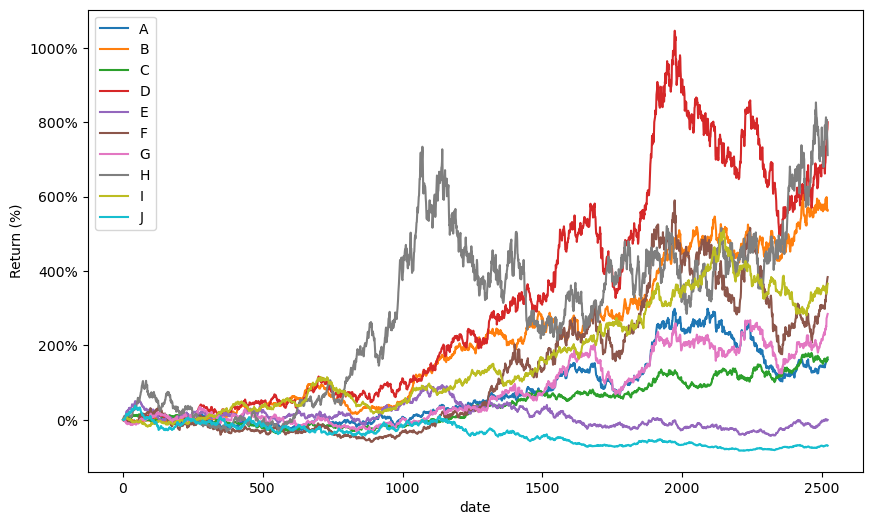

In [2]:
# Plot the returns for each asset
returns = (df / df.iloc[0]) - 1
ax = returns.plot(figsize=(10, 6))
ax.set_ylabel('Return (%)')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))
plt.show()

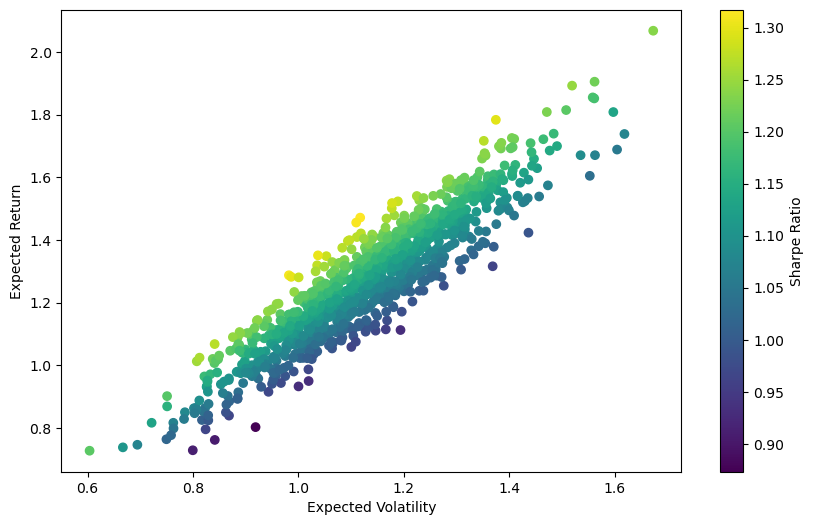

Optimal weights:
 A    0.003587
B    0.106128
C    0.024024
D    0.034810
E    0.221927
F    0.080567
G    0.022141
H    0.237124
I    0.206949
J    0.062743
Name: 599, dtype: float64


In [26]:
# Plot efficient frontier with random weights
num_portfolios = 1000

expected_returns = returns.mean()

all_weights = pd.DataFrame(np.zeros((num_portfolios, len(df.columns))), columns=df.columns)
port_returns = np.zeros(num_portfolios)
port_volatility = np.zeros(num_portfolios)
sharpe_ratio = np.zeros(num_portfolios)

for i in range(num_portfolios):
    weights = np.random.random(len(df.columns))
    weights /= np.sum(weights)
    all_weights.iloc[i] = weights
    
    port_returns[i] = np.sum(expected_returns * weights)
    port_volatility[i] = np.sqrt(np.dot(weights.T, np.dot(cov_matrix_norm, weights)))
    sharpe_ratio[i] = port_returns[i] / port_volatility[i]

max_sharpe_ratio_idx = sharpe_ratio.argmax()

plt.figure(figsize=(10, 6))
plt.scatter(port_volatility, port_returns, c=sharpe_ratio, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

plt.show()


print('Optimal weights:\n', all_weights.iloc[max_sharpe_ratio_idx])